## 2.1 Epsilon greedy action implementation
This section implements epsilon greedy action. First we will implement the strategy for K-bandit problem with k = 10 and all action rewards are gaussian distributed with mean = 0 and stdev = 1 (the standard gaussian distribution)

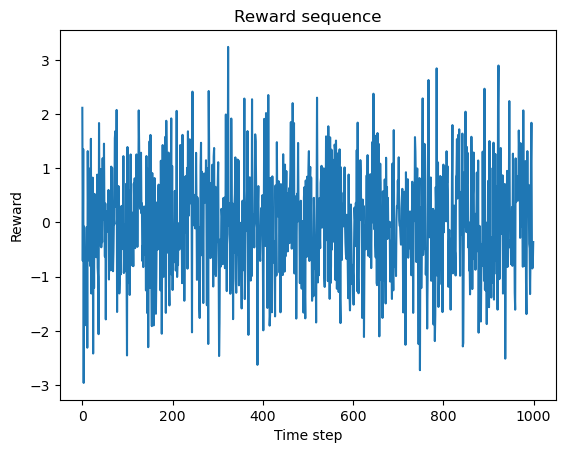

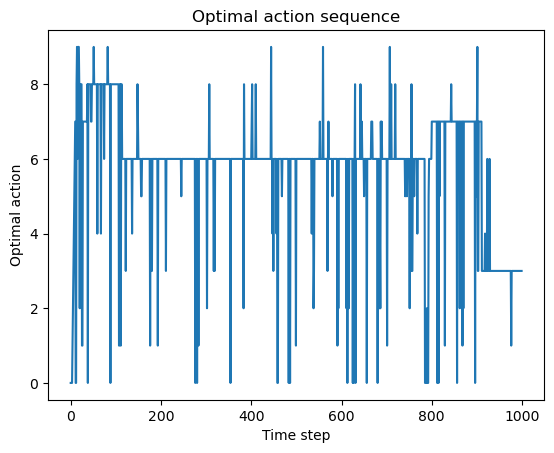

In [4]:
import kbandit as kb
from matplotlib import pyplot as plt

K = 10
MEANS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
STDEV= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
EPSILON = 0.1

# Initialize the k-bandit env
env = kb.KBanditEnvironment()
for i in range(K):
    env.add_arm(MEANS[i], STDEV[i])

# Initialize the agent
agent = kb.KBanditBaseAgent(env)
agent.set_action_type("epsilon_greedy")
agent.set_epsilon(EPSILON)

# Run the agent
agent.run(1000)

# Plot reward sequence
agent_reward_sq = agent.get_reward_sequence()
plt.plot(agent_reward_sq)
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.title("Reward sequence")
plt.show()

# Plot optimal action sequence
agent_optimal_sq = agent.get_action_sequence()
plt.plot(agent_optimal_sq)
plt.xlabel("Time step")
plt.ylabel("Optimal action")
plt.title("Optimal action sequence")
plt.show()

Next step, we try to implement epsilon greedy action method for different epsilons. The environment will be changed so there will be a different mean and std for each arm.

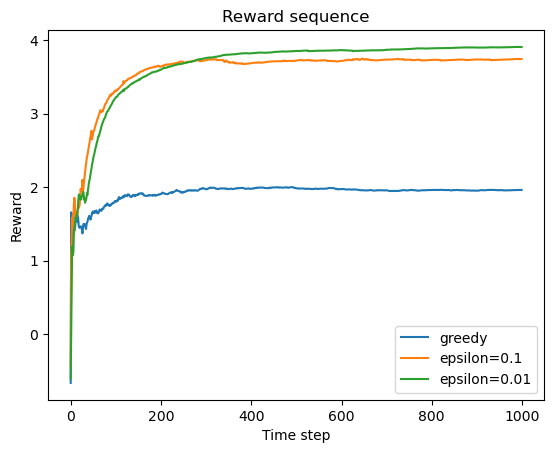

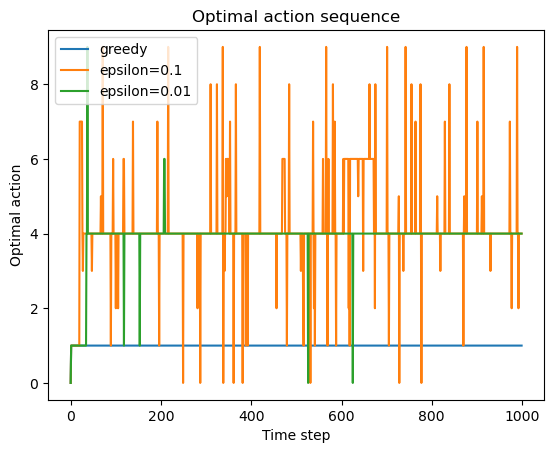

In [5]:
import kbandit as kb
from matplotlib import pyplot as plt

K = 10
MEANS = [0, 2, 3, -1, 4, 1, 4, 3, 1, 2]
STDEV = [0.5, 1, 0.5, 2, 0.4, 0.5, 2, 0.8, 1.2, 1]

# Initialize the k-bandit env
env = kb.KBanditEnvironment()
for i in range(K):
    env.add_arm(MEANS[i], STDEV[i])

# Initialize the agents
full_greedy_agent = kb.KBanditBaseAgent(env)
full_greedy_agent.set_action_type("epsilon_greedy")
full_greedy_agent.set_epsilon(0)

epsilon_greedy_agent_1 = kb.KBanditBaseAgent(env)
epsilon_greedy_agent_1.set_action_type("epsilon_greedy")
epsilon_greedy_agent_1.set_epsilon(0.1)

epsilon_greedy_agent_2 = kb.KBanditBaseAgent(env)
epsilon_greedy_agent_2.set_action_type("epsilon_greedy")
epsilon_greedy_agent_2.set_epsilon(0.01)


# Run the agents
full_greedy_agent.run(1000)
epsilon_greedy_agent_1.run(1000)
epsilon_greedy_agent_2.run(1000)

# Plot average reward sequence
full_greedy_agent_reward_sq = full_greedy_agent.get_reward_sequence()
epsilon_greedy_agent_1_reward_sq = epsilon_greedy_agent_1.get_reward_sequence()
epsilon_greedy_agent_2_reward_sq = epsilon_greedy_agent_2.get_reward_sequence()

full_greedy_agent_reward_sq = [sum(full_greedy_agent_reward_sq[:i+1])/(i+1) for i in range(len(full_greedy_agent_reward_sq))]
epsilon_greedy_agent_1_reward_sq = [sum(epsilon_greedy_agent_1_reward_sq[:i+1])/(i+1) for i in range(len(epsilon_greedy_agent_1_reward_sq))]
epsilon_greedy_agent_2_reward_sq = [sum(epsilon_greedy_agent_2_reward_sq[:i+1])/(i+1) for i in range(len(epsilon_greedy_agent_2_reward_sq))]

plt.plot(full_greedy_agent_reward_sq, label="greedy")
plt.plot(epsilon_greedy_agent_1_reward_sq, label="epsilon=0.1")
plt.plot(epsilon_greedy_agent_2_reward_sq, label="epsilon=0.01")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.title("Reward sequence")
plt.legend()
plt.show()

# Plot optimal action sequence
full_greedy_agent_optimal_sq = full_greedy_agent.get_action_sequence()
epsilon_greedy_agent_1_optimal_sq = epsilon_greedy_agent_1.get_action_sequence()
epsilon_greedy_agent_2_optimal_sq = epsilon_greedy_agent_2.get_action_sequence()

plt.plot(full_greedy_agent_optimal_sq, label="greedy")
plt.plot(epsilon_greedy_agent_1_optimal_sq, label="epsilon=0.1")
plt.plot(epsilon_greedy_agent_2_optimal_sq, label="epsilon=0.01")
plt.xlabel("Time step")
plt.ylabel("Optimal action")
plt.title("Optimal action sequence")
plt.legend()
plt.show()



## 2.2 UCB & Gradient Bandit Implementation

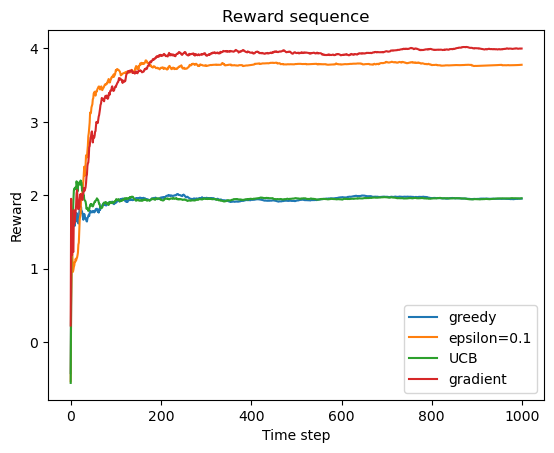

In [6]:
import kbandit as kb
from matplotlib import pyplot as plt

K = 10
MEANS = [0, 2, 3, -1, 4, 1, 4, 3, 1, 2]
STDEV = [0.5, 1, 0.5, 2, 0.4, 0.5, 2, 0.8, 1.2, 1]

# Initialize the k-bandit env
env = kb.KBanditEnvironment()
for i in range(K):
    env.add_arm(MEANS[i], STDEV[i])

# Initialize the agents
# Initialize the agents
full_greedy_agent = kb.KBanditBaseAgent(env)
full_greedy_agent.set_action_type("epsilon_greedy")
full_greedy_agent.set_epsilon(0)

epsilon_greedy_agent = kb.KBanditBaseAgent(env)
epsilon_greedy_agent.set_action_type("epsilon_greedy")
epsilon_greedy_agent.set_epsilon(0.1)

ucb_agent = kb.KBanditBaseAgent(env)
ucb_agent.set_action_type("UCB")
ucb_agent.set_ucb_parameter(2)

gradient_agent = kb.KBanditBaseAgent(env)
gradient_agent.set_action_type("gradient")
gradient_agent.set_gradient_parameter(0.1)

# Run the agents
full_greedy_agent.run(1000)
epsilon_greedy_agent.run(1000)
ucb_agent.run(1000)
gradient_agent.run(1000)

# Plot average reward sequence
full_greedy_agent_reward_sq = full_greedy_agent.get_reward_sequence()
epsilon_greedy_agent_reward_sq = epsilon_greedy_agent.get_reward_sequence()
ucb_agent_reward_sq = ucb_agent.get_reward_sequence()
gradient_agent_reward_sq = gradient_agent.get_reward_sequence()

full_greedy_agent_reward_sq = [sum(full_greedy_agent_reward_sq[:i+1])/(i+1) for i in range(len(full_greedy_agent_reward_sq))]
epsilon_greedy_agent_reward_sq = [sum(epsilon_greedy_agent_reward_sq[:i+1])/(i+1) for i in range(len(epsilon_greedy_agent_reward_sq))]
ucb_agent_reward_sq = [sum(ucb_agent_reward_sq[:i+1])/(i+1) for i in range(len(ucb_agent_reward_sq))]
gradient_agent_reward_sq = [sum(gradient_agent_reward_sq[:i+1])/(i+1) for i in range(len(gradient_agent_reward_sq))]

plt.plot(full_greedy_agent_reward_sq, label="greedy")
plt.plot(epsilon_greedy_agent_reward_sq, label="epsilon=0.1")
plt.plot(ucb_agent_reward_sq, label="UCB")
plt.plot(gradient_agent_reward_sq, label="gradient")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.title("Reward sequence")
plt.legend()

## 2.3 Optimistic Initial Value Implementation

Lastly, we implement optimistic initial value on our agent. We will show that it is the best to use full greedy with optimistic initial value because of its performance and efficiency. We made the add_q_value method to add value to q_values as its initial values

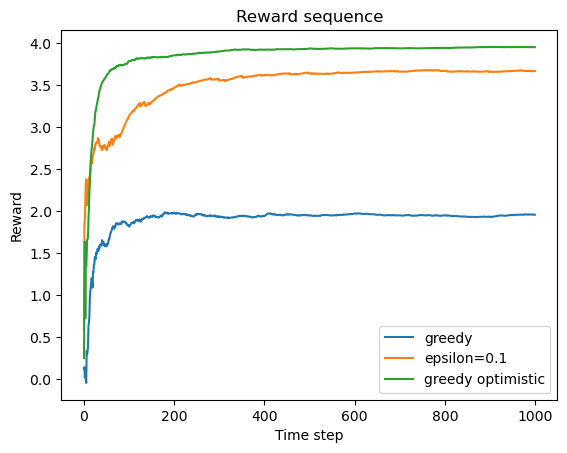

In [2]:
import kbandit as kb
from matplotlib import pyplot as plt

K = 10
MEANS = [0, 2, 3, -1, 4, 1, 4, 3, 1, 2]
STDEV = [0.5, 1, 0.5, 2, 0.4, 0.5, 2, 0.8, 1.2, 1]

# Initialize the k-bandit env
env = kb.KBanditEnvironment()
for i in range(K):
    env.add_arm(MEANS[i], STDEV[i])

# Initialize the agents
full_greedy_agent = kb.KBanditBaseAgent(env)
full_greedy_agent.set_action_type("epsilon_greedy")
full_greedy_agent.set_epsilon(0)

epsilon_greedy_agent = kb.KBanditBaseAgent(env)
epsilon_greedy_agent.set_action_type("epsilon_greedy")
epsilon_greedy_agent.set_epsilon(0.1)

full_greedy_optimistic_agent = kb.KBanditBaseAgent(env)
full_greedy_optimistic_agent.set_action_type("epsilon_greedy")
full_greedy_optimistic_agent.set_epsilon(0)
full_greedy_optimistic_agent.add_q_values(5)
# Run the agents
full_greedy_agent.run(1000)
epsilon_greedy_agent.run(1000)
full_greedy_optimistic_agent.run(1000)

# Plot average reward sequence
full_greedy_agent_reward_sq = full_greedy_agent.get_reward_sequence()
epsilon_greedy_agent_reward_sq = epsilon_greedy_agent.get_reward_sequence()
full_greedy_optimistic_agent_reward_sq = full_greedy_optimistic_agent.get_reward_sequence()

full_greedy_agent_reward_sq = [sum(full_greedy_agent_reward_sq[:i+1])/(i+1) for i in range(len(full_greedy_agent_reward_sq))]
epsilon_greedy_agent_reward_sq = [sum(epsilon_greedy_agent_reward_sq[:i+1])/(i+1) for i in range(len(epsilon_greedy_agent_reward_sq))]
full_greedy_optimistic_agent_reward_sq = [sum(full_greedy_optimistic_agent_reward_sq[:i+1])/(i+1) for i in range(len(full_greedy_optimistic_agent_reward_sq))]


plt.plot(full_greedy_agent_reward_sq, label="greedy")
plt.plot(epsilon_greedy_agent_reward_sq, label="epsilon=0.1")
plt.plot(full_greedy_optimistic_agent_reward_sq, label="greedy optimistic")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.title("Reward sequence")
plt.legend()
plt.show()